# Computer vision libraries in pytorch

- **torchvision** – base domain library for PyTorch computer vision  
- **torchvision.datasets** – get datasets and data loading functions for computer vision here  
- **torchvision.models** – get pretrained computer vision models that you can leverage for your own problems  
- **torchvision.transforms** – functions for manipulating your vision data (images) to be suitable for use with an ML model  
- **torch.utils.data.Dataset** – base dataset class for PyTorch  
- **torch.utils.data.DataLoader** – creates a Python iterable over a dataset


In [1]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
print(torch.__version__)
print(torchvision.__version__)

2.9.1+cu128
0.24.1+cu128


# Getting a Data

In [3]:
# Setup training and testing data

train_data = datasets.FashionMNIST(
    root = "data",
    train = True,
    download= True,
    transform= ToTensor(),
    target_transform= None
)

test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform= ToTensor(),
    target_transform= None
)

In [4]:
len(train_data), len(test_data)

(60000, 10000)

In [5]:
image,label = train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [6]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [7]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [8]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [9]:
image.shape, label

(torch.Size([1, 28, 28]), 9)

In [10]:
# Check the shape of the image
print(f"Image shape: {image.shape} -> [color_channel, height, weight]")
print(f"Image label: {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> [color_channel, height, weight]
Image label: Ankle boot


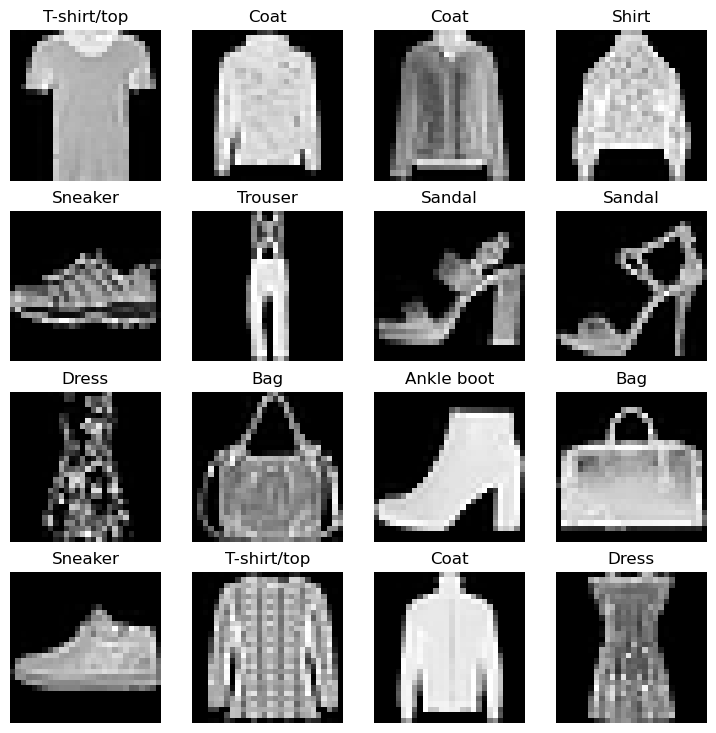

In [11]:
# Plot more images
# torch.manual_seed(42)

fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4

for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]

    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

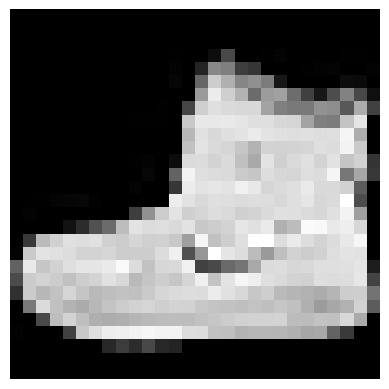

In [12]:
image, label = train_data[0]

plt.imshow(image.squeeze(), cmap = "gray")
plt.axis(False)

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

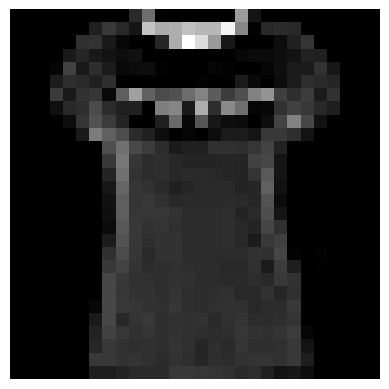

In [13]:
image, label = train_data[34]
plt.imshow(image.squeeze(), cmap = "gray")
plt.axis(False)

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

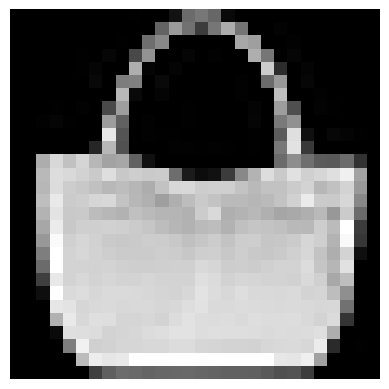

In [14]:
image, label = train_data[100]
plt.imshow(image.squeeze(), cmap = "gray")
plt.axis(False)

In [15]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

## 2. Prepare DataLoader

Right now, our data is in the form of PyTorch Datasets.

DataLoader turns our dataset into a Python iterable.

More specifically, we want to turn our data into batches (or mini-batches).

Why would we do this?

1. It is more computationally efficient, as in, your computing hardware may not be able to look (store in memory) at 60000 images in one hit. So we break it down to 32 images at a time (batch size of 32).

2. It gives our neural network more chances to update its gradients per epoch.


In [16]:
len(train_data), len(test_data)

(60000, 10000)

In [17]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(train_data,
                              batch_size=BATCH_SIZE,
                              shuffle= True)
test_dataloader = DataLoader(dataset=test_data,
                             batch_size = BATCH_SIZE,
                             shuffle = True)

In [18]:
# Checking out what is created

print(f"DataLoader: {train_dataloader},\n{test_dataloader}")
print(f"Length of train DataLoader: {len(train_dataloader)} batches of {BATCH_SIZE}...")
print(f"Length of test DataLoader: {len(test_dataloader)} batches of {BATCH_SIZE}...")

DataLoader: <torch.utils.data.dataloader.DataLoader object at 0x7fec0299bb90>,
Length of train DataLoader: 1875 batches of 32...
Length of test DataLoader: 313 batches of 32...


In [19]:
# Check out what's inside the dataloader

train_feature_batch, train_label_batch = next(iter(train_dataloader))
train_feature_batch.shape, train_label_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

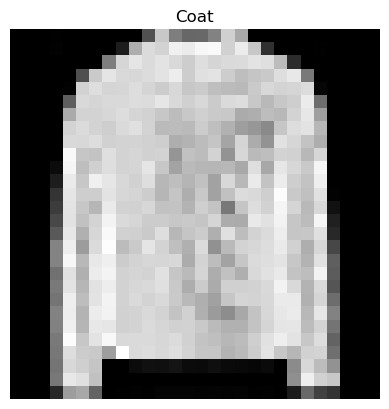

In [20]:
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_feature_batch), size=[1]).item()
img, label = train_feature_batch[random_idx], train_label_batch[random_idx]

plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

# Building a Model

In [21]:
flatten_model = nn.Flatten()

x = train_feature_batch[0]
output = flatten_model(x)

print(f"Shape before flattening: {x.shape} -> [channel, height, weight]")
print(f"Shape after flattening: {output.shape} -> [channel, hight*weight]")

Shape before flattening: torch.Size([1, 28, 28]) -> [channel, height, weight]
Shape after flattening: torch.Size([1, 784]) -> [channel, hight*weight]


In [22]:
class FashionMNISTModelV0(nn.Module):
    def __init__(self,
                 input_shape: int,
                 output_shape: int,
                 hidden_units: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,
                      out_features=hidden_units),
            nn.Linear(in_features=hidden_units,
                      out_features=output_shape)
        )

    def forward(self, x):
            return self.layer_stack(x)

In [23]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [24]:
model_0 = FashionMNISTModelV0(input_shape=28*28,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)
model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [25]:
# Creating a loss funtion and optimizer and evaluation

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                             lr =0.1)

def accuracy_fn(y_true, y_pred):
    y_pred_labels = y_pred.argmax(dim=1)
    correct = torch.eq(y_true, y_pred_labels).sum().item()
    acc = (correct / len(y_true)) * 100
    return acc

## Creating a function to time our experiments

Machine learning is very experimental.

Two of the main things you'll often want to track are:

1. Model's performance (loss and accuracy values etc)
2. How fast it runs


In [26]:
from tqdm.auto import tqdm

torch.manual_seed(42)
epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n------")
    # Training
    train_loss = 0
    train_acc = 0

    model_0.train()
    for batch, (X, y) in enumerate(train_dataloader):
        X, y = X.to(device), y.to(device)
        
        y_pred = model_0(X)
        loss = loss_fn(y_pred, y)
        acc = accuracy_fn(y_true=y, y_pred=y_pred)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        train_acc += acc

        if batch % 400 == 0:
            print(f"Looked at {batch*len(X)}/ {len(train_dataloader.dataset)} samples.")

    train_loss /= len(train_dataloader)
    train_acc /= len(train_dataloader)

    # Testing
    test_loss = 0
    test_acc = 0

    model_0.eval()
    with torch.inference_mode():
        for batch, (X_test, y_test) in enumerate(test_dataloader):
            X_test, y_test = X_test.to(device), y_test.to(device)
            
            pred_test = model_0(X_test)
            loss = loss_fn(pred_test, y_test)
            acc = accuracy_fn(y_true=y_test, y_pred=pred_test)

            test_loss += loss.item()
            test_acc += acc

    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

    if epoch % 1 == 0:
        print(
            f"\nTrain Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}% | "
            f"Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%"
        )


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Looked at 0/ 60000 samples.
Looked at 12800/ 60000 samples.
Looked at 25600/ 60000 samples.
Looked at 38400/ 60000 samples.
Looked at 51200/ 60000 samples.

Train Loss: 0.5948, Train Acc: 78.99% | Test Loss: 0.5170, Test Acc: 81.83%
Epoch: 1
------
Looked at 0/ 60000 samples.
Looked at 12800/ 60000 samples.
Looked at 25600/ 60000 samples.
Looked at 38400/ 60000 samples.
Looked at 51200/ 60000 samples.

Train Loss: 0.4774, Train Acc: 83.17% | Test Loss: 0.5343, Test Acc: 81.40%
Epoch: 2
------
Looked at 0/ 60000 samples.
Looked at 12800/ 60000 samples.
Looked at 25600/ 60000 samples.
Looked at 38400/ 60000 samples.
Looked at 51200/ 60000 samples.

Train Loss: 0.4555, Train Acc: 84.08% | Test Loss: 0.5168, Test Acc: 82.89%
